In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

df_clean = pd.read_csv('../data/processed/kicksharing_cleaned.csv')
df_clean.head(5)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,month,day,is_weekend,hour,part_of_day
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,8,7,0,9,morning
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,10,17,0,14,afternoon
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,9,19,0,5,night
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,10,4,0,16,afternoon
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,7,10,0,6,morning


In [3]:
df_clean['created_dttm'] = pd.to_datetime(df_clean['created_dttm'])
df_clean['book_start_dttm'] = pd.to_datetime(df_clean['book_start_dttm'])
df_clean['book_end_dttm'] = pd.to_datetime(df_clean['book_end_dttm'])
df_clean['local_book_start_dttm'] = pd.to_datetime(df_clean['local_book_start_dttm'])


In [4]:
df_clean.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,month,day,is_weekend,hour
count,3.668980e+05,3.668980e+05,366898.000000,366898.000000,366898.000000,366898.000000,366898.000000,366898,366898,366898,366898.000000,366898,366898.000000,366898.000000,366898.000000,366898.000000,366898.000000,366898.000000,366898.000000
mean,2.893273e+08,6.011111e+08,31.495176,7.291189,42.657687,299.985555,2.628579,2024-08-19 00:22:19.353359616,2024-08-19 00:22:25.499246592,2024-08-19 00:34:01.612908032,3.526520,2024-08-19 00:54:00.969922304,129.663838,37.509923,0.000422,8.087507,15.780446,0.259222,12.124939
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,2024-04-13 16:50:15,2024-04-13 16:50:21.117843,2024-04-13 16:51:43.191542,0.000000,2024-04-13 16:50:21.117843,2.500000,0.200000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,2.618163e+08,3.004387e+08,24.000000,6.490000,30.000000,300.000000,0.980767,2024-07-22 14:32:04,2024-07-22 14:32:07.422697984,2024-07-22 14:42:27.431589120,3.000000,2024-07-22 15:01:42.896391680,81.960000,11.240000,0.000000,7.000000,8.000000,0.000000,8.000000
50%,2.704375e+08,6.112704e+08,31.000000,7.490000,50.000000,300.000000,1.762169,2024-08-23 13:59:10.500000,2024-08-23 13:59:15.331394304,2024-08-23 14:10:26.528608,3.000000,2024-08-23 14:43:46.477773568,104.900000,18.730000,0.000000,8.000000,16.000000,0.000000,13.000000
75%,3.432681e+08,8.650667e+08,37.000000,8.220000,50.000000,300.000000,3.094210,2024-09-16 14:54:25.750000128,2024-09-16 14:54:29.438250240,2024-09-16 15:06:30.332252416,3.000000,2024-09-16 15:20:42.926999808,143.810000,35.060000,0.000000,9.000000,23.000000,1.000000,16.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,411.232861,2024-10-21 16:01:41,2024-10-21 16:01:45.938000,2024-10-21 17:07:53.346000,12.000000,2024-10-21 19:54:12.881000,5627.640000,3185.000000,57.000000,10.000000,31.000000,1.000000,23.000000
std,3.813597e+07,3.308186e+08,9.410797,1.289222,11.945960,1.845736,5.592899,NaN,NaN,NaN,1.199301,NaN,98.831667,75.149990,0.138175,1.207958,8.765091,0.438208,5.353576


In [5]:
daily_riders = df_clean.groupby(df_clean['created_dttm'].dt.date)['order_rk'].count().reset_index()
daily_riders.columns = ['date', 'riders_count']

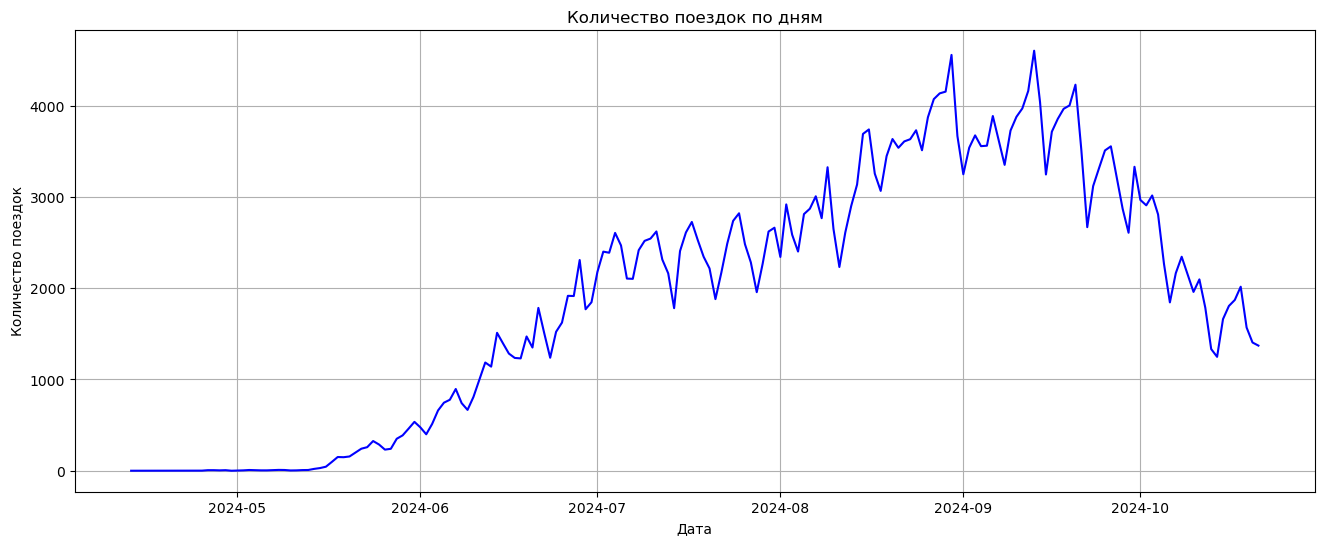

In [6]:
plt.figure(figsize=(16, 6))
plt.plot(daily_riders['date'], daily_riders['riders_count'], c='blue')
plt.title('Количество поездок по дням')
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.tight_layout;


График показывает четкую сезонную составляющую с пиками в теплые месяцы и спадами в холодные. Также можно заметить выбросы с аномально низким спросом — вероятно, это были дни с неблагоприятными погодными условиями, либо выходные или праздники.

In [7]:
monthly_riders = df_clean.groupby(df_clean['month'])['order_rk'].count()

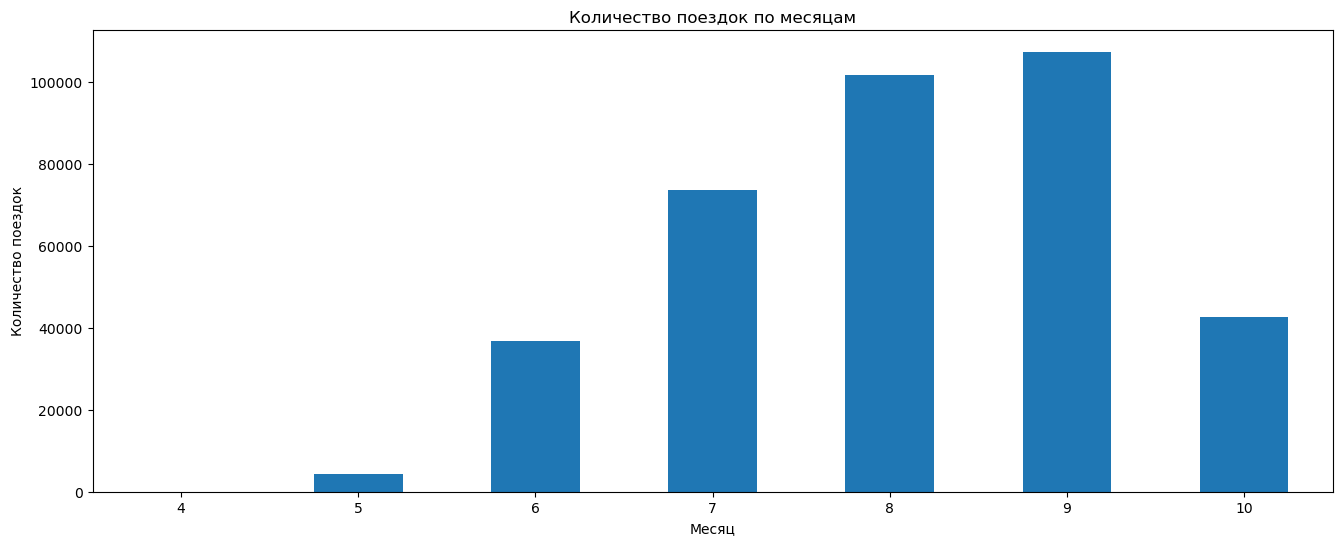

In [8]:
plt.figure(figsize=(16, 6))
monthly_riders.plot(kind='bar')
plt.title('Количество поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.xticks(rotation=0);


Гистограмма подтверждает сильную сезонность. Пиковые месяцы — с июля по сентябрь. 

In [9]:
hourly_avg = df_clean.groupby('hour')['order_rk'].count()

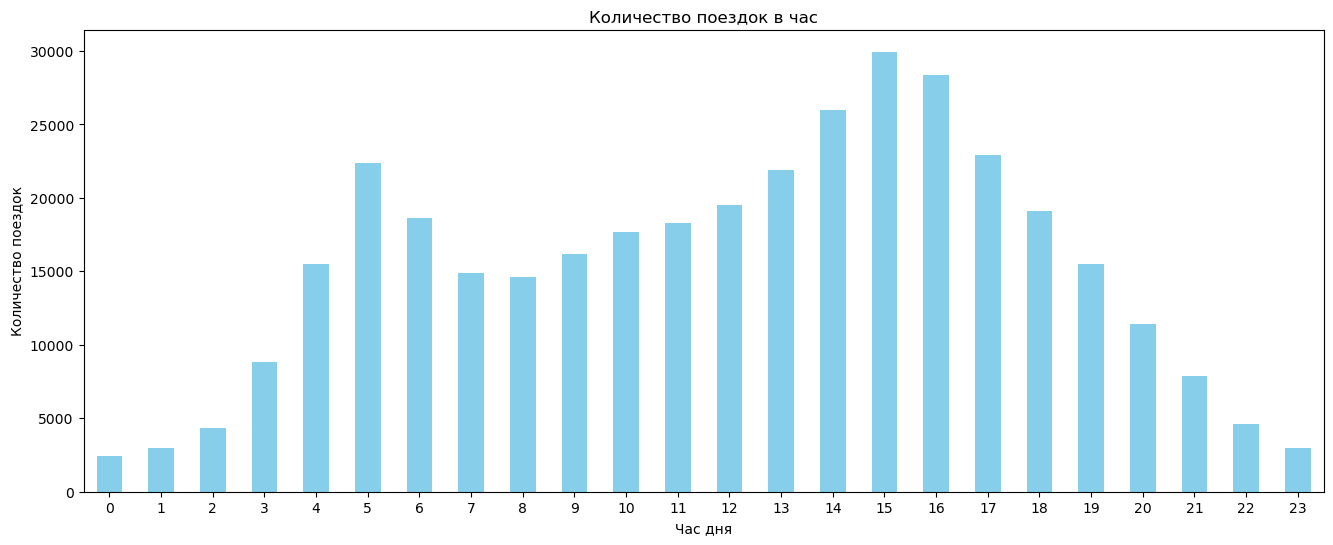

In [10]:
plt.figure(figsize=(16, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Количество поездок в час')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.xticks(rotation=0);


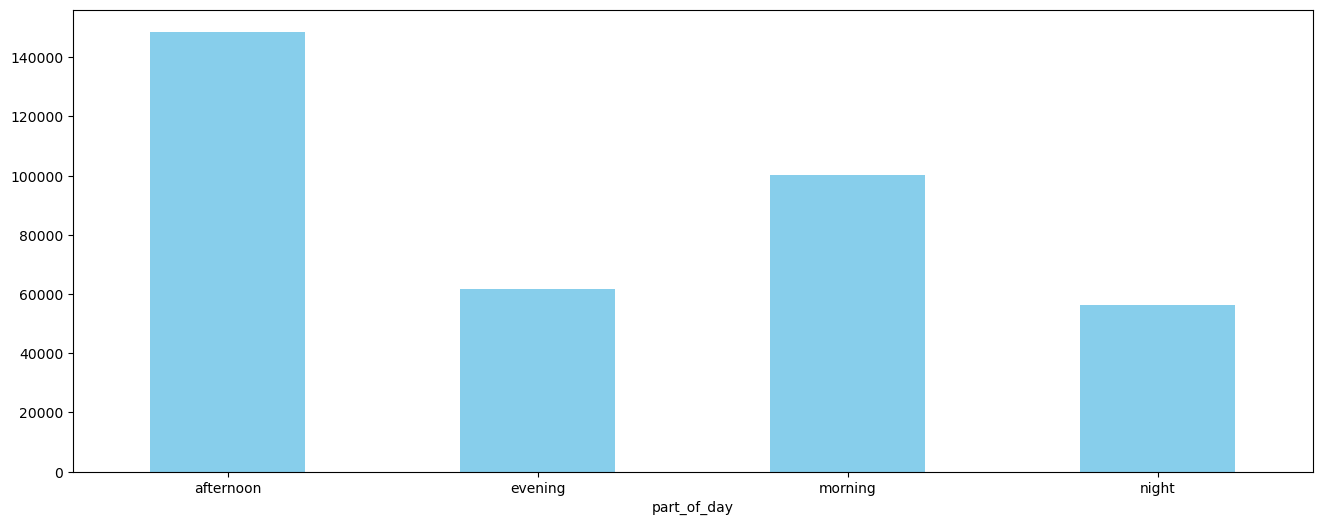

In [11]:
part_of_day = df_clean.groupby('part_of_day')['order_rk'].count()
plt.figure(figsize=(16, 6))
part_of_day.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0);

Наблюдается классическая двухпиковая модель городской мобильности. Явный пик с 4 до 7 утра (поездки на работу/учебу) и еще более выраженный пик с 13 до 17 (поездки домой и по личным делам). Минимальная активность — с 21 до 3 утра

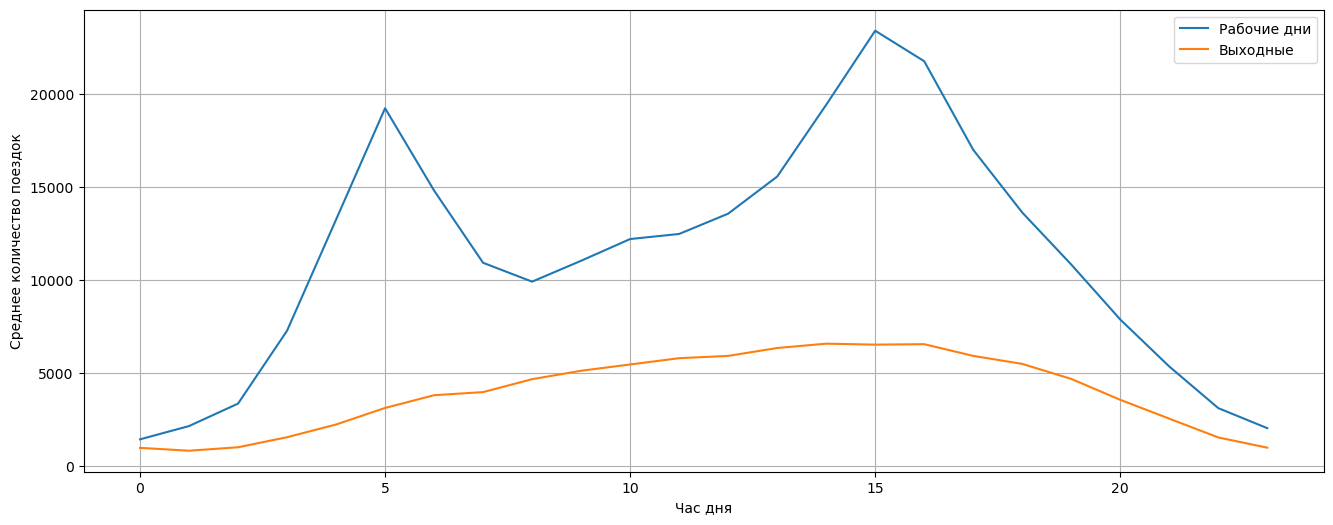

<Figure size 1600x600 with 0 Axes>

In [12]:
pivot_hour_weekend = df_clean.pivot_table(index='hour', columns = 'is_weekend', values='order_rk', aggfunc='count')
pivot_hour_weekend.columns = ['Рабочие дни', 'Выходные']
pivot_hour_weekend.plot(figsize=(16,6))
plt.xlabel('Час дня')
plt.ylabel('Среднее количество поездок')
plt.grid(True)
plt.figure(figsize=(16,6));



Паттерны кардинально различаются. В выходные дни утренний пик сглажен, а основной спрос равномерно распределен с 11 утра до 18-19 вечера.

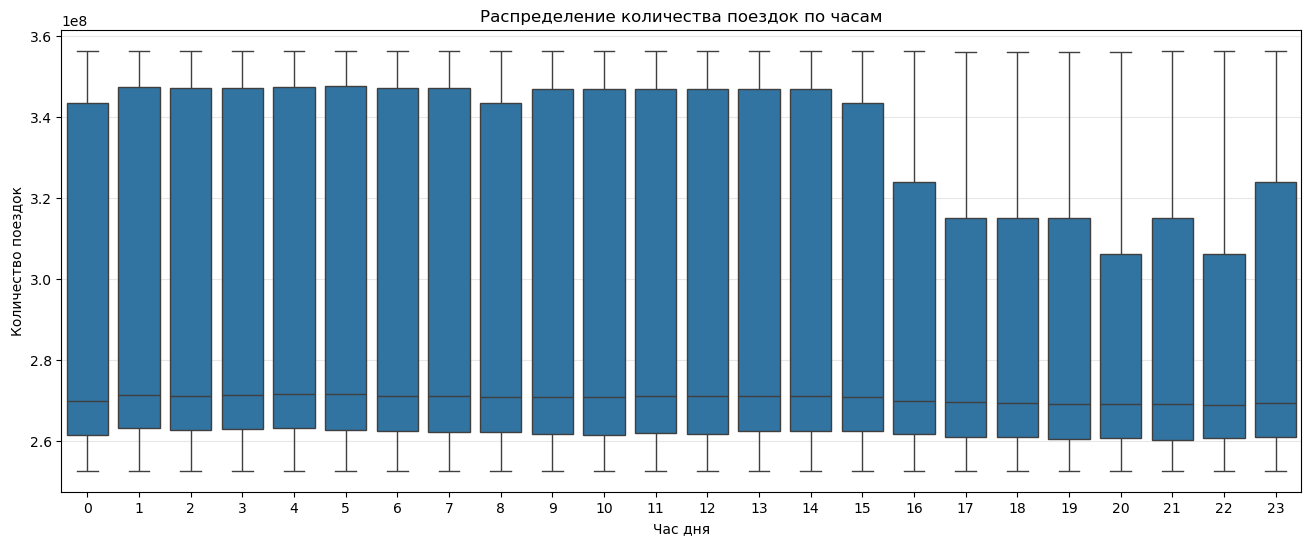

In [13]:
plt.figure(figsize=(16,6))
sns.boxplot(x='hour', y='order_rk', data=df_clean)
plt.title('Распределение количества поездок по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.grid(axis='y', alpha=0.3)


Боксплот подтверждает выводы о пиках, но также показывает разброс данных. Например, в 17-18 часов не только высокий медианный спрос, но и большой разброс — в некоторые дни вечерняя активность может быть особенно высокой (например, в пятницу или в хорошую погоду).

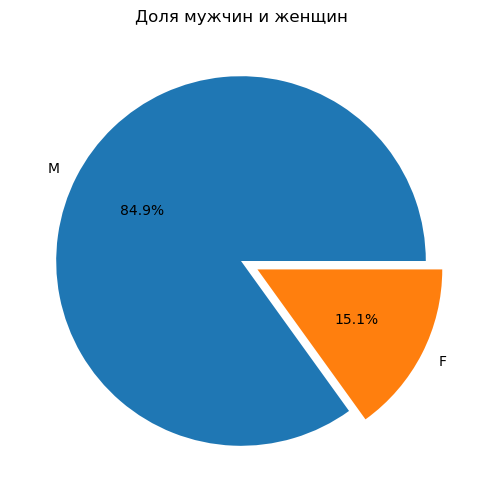

In [14]:
male = df_clean[(df_clean['gender_cd'] == 'M')]['gender_cd'].count()
female = df_clean[(df_clean['gender_cd'] == 'F')]['gender_cd'].count()
votes = [male,female]
lbl = ['M', 'F']
plt.figure(figsize=(16,6))
plt.pie(votes, labels=lbl, explode=[0, 0.1], autopct='%1.1f%%')
plt.title('Доля мужчин и женщин');

График показывает, что клиенты в большей степени мужчины.

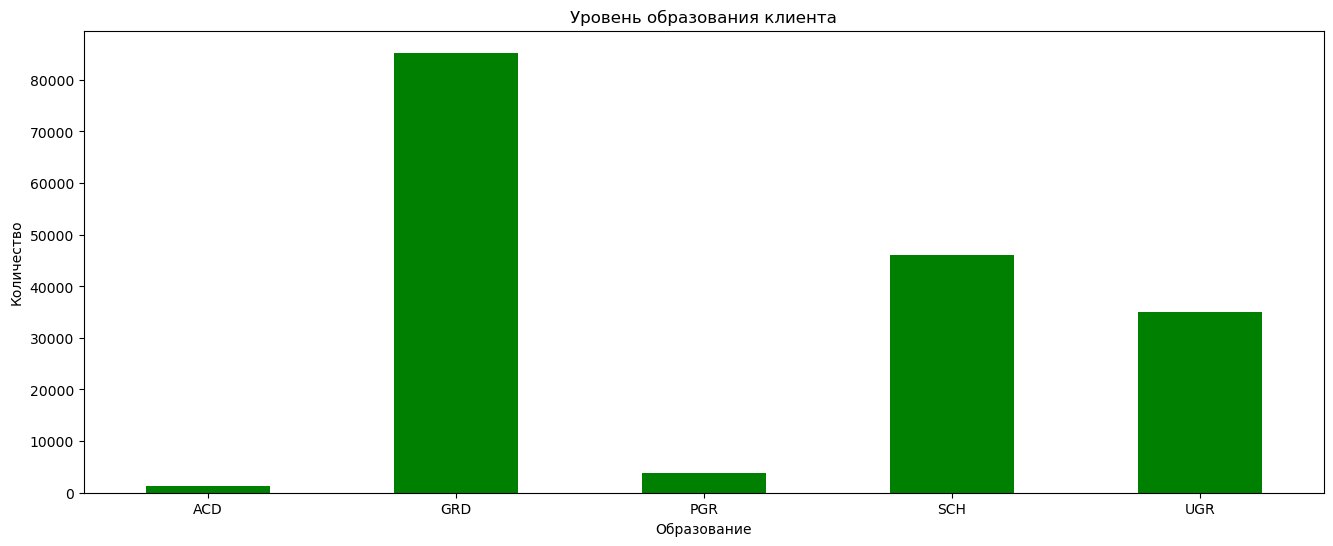

In [15]:
education = df_clean.groupby('education_level_cd')['order_rk'].count()
plt.figure(figsize=(16,6))
education.plot(kind='bar', color='green')
plt.title('Уровень образования клиента')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.xticks(rotation=0);


Абсолютным ядром и целевой аудиторией сервиса являются клиенты с высшим образованием (GRD). Эта группа формирует более половины всего клиентского портфеля и является основным драйвером бизнеса.

In [16]:
states = df_clean.groupby('lvn_state_nm')['order_rk'].count().sort_values(ascending= False)
top_20_states = states.head(20).sum()
other_states = states.sum() - top_20_states
print(round(top_20_states/states.sum() * 100, 0), round(other_states/states.sum() * 100, 0))

83.0 17.0


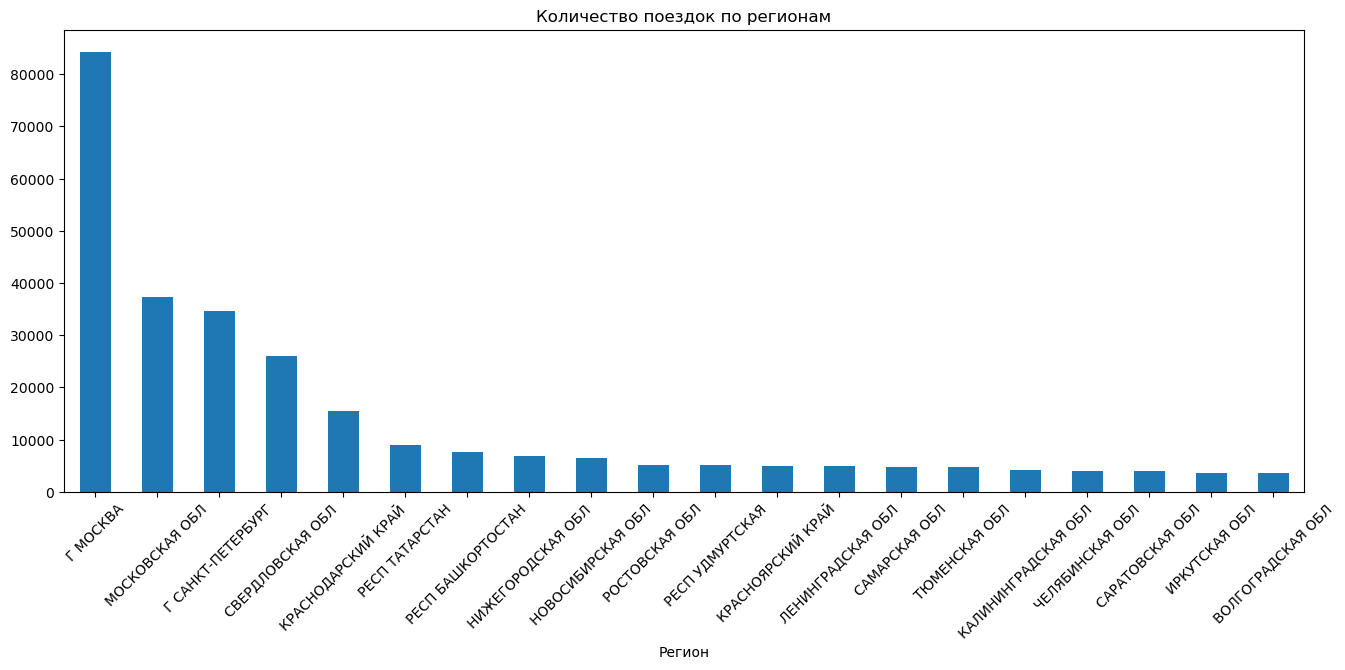

In [17]:
plt.figure(figsize=(16,6))
states.head(20).plot(kind='bar')
plt.title('Количество поездок по регионам')
plt.xlabel('Регион')
plt.xticks(rotation=45)
plt.tight_layout;

Бизнес имеет ярко выраженную локальную концентрацию и сильно зависит от нескольких ключевых регионов. Сервис не является равномерно распределенным по стране, а сфокусирован в основных урбанизированных центрах.

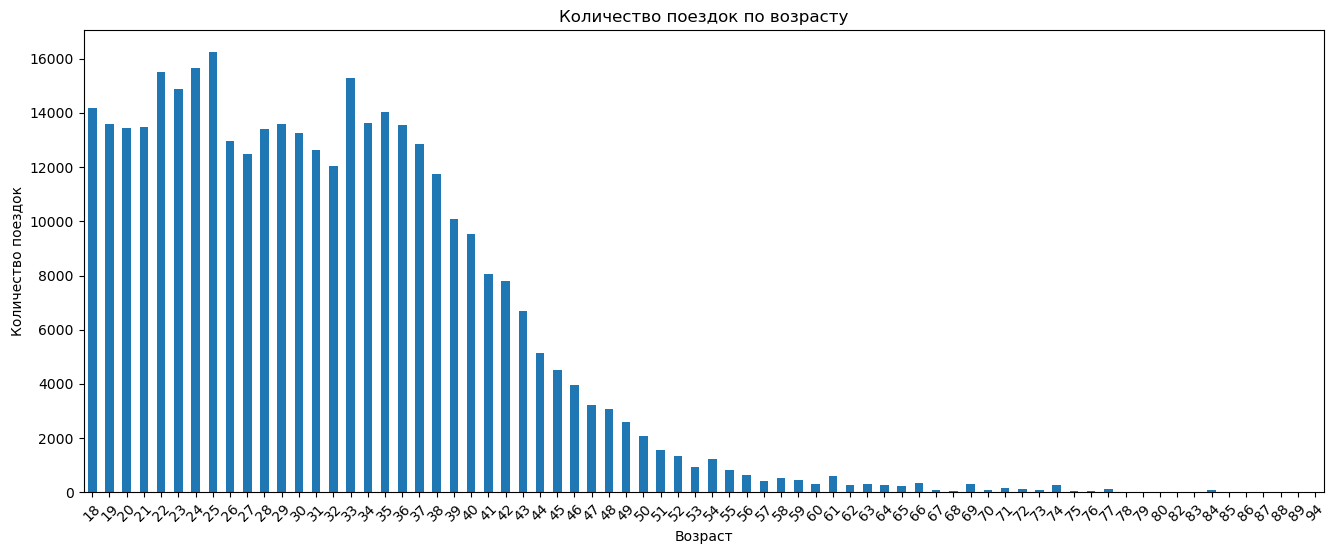

In [29]:
ages = df_clean[df_clean['age'] > 17].groupby('age')['order_rk'].count()
plt.figure(figsize=(16,6))
ages.plot(kind='bar')
plt.title('Количество поездок по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45);

Анализ возрастного распределения клиентов выявил, что ядро аудитории сервиса составляют люди в возрасте от 18 до 38 лет. Данная возрастная когорта сочетает в себе ключевые для нашего продукта характеристики: физическую мобильность, привычку к использованию технологичных сервисов и регулярную потребность в ежедневных городских перемещениях.